# Reinforcement - Learning

Reinforcement learning involves an agent, a set of states $S$, and a set $A$ of actions per state. By performing an action $a ∈ A$, the agent transitions from state to state. Executing an action in a specific state provides the agent with a reward (a numerical score).

The goal of the agent is to maximize its total reward. It does this by adding the maximum reward attainable from future states to the reward for achieving its current state, effectively influencing the current action by the potential future reward. This potential reward is a weighted sum of expected values of the rewards of all future steps starting from the current state. 

## BipedalWalker-v2

Reward is given for moving forward, total 300+ points up to the far end. If the robot falls, it gets -100. Applying motor torque costs a small amount of points, more optimal agent will get better score. State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements. There's no coordinates in the state vector.


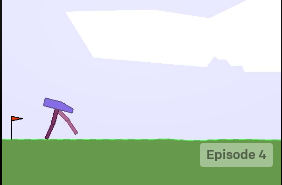


Source: https://github.com/openai/gym/blob/master/gym/envs/box2d/bipedal_walker.py

# Q Learning

**Q-learning** is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations.   

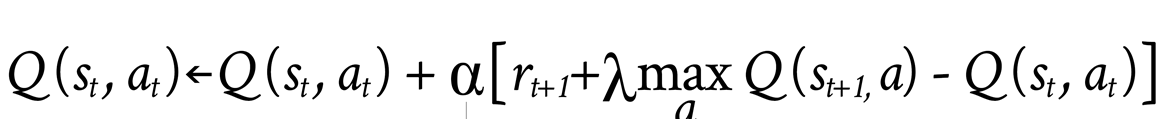

For any finite Markov decision process (FMDP), Q-learning finds an optimal policy in the sense of maximizing the expected value of the total reward over any and all successive steps, starting from the current state.

Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy. "Q" refers to the function that the algorithm computes – the expected rewards for an action taken in a given state.

In [ ]:
#!pip install gym[box2d]
#!pip3 install box2d-py
#!pip3 install gym[Box_2D]
#!pip install Box2D
# !pip3 install Box2D
# !pip3 install box2d-py
# !pip3 install gym[all]
# !pip3 install gym[Box_2D]
#!conda install swig

In [10]:
#%%
import numpy as np
import random
import gym
import math
from collections import defaultdict, deque
import matplotlib.pyplot as graph

## Define the Bipedal Walker environment here

In [11]:
#%%
ENV = "BipedalWalker-v3"

EPISODES = 1000
GAMMA =  0.99
ALPHA = 0.01
HIGHSCORE = -200

stateBounds = [(0, math.pi),
           (-2,2),
           (-1,1),
           (-1,1),
           (0,math.pi),
           (-2,2),
           (0, math.pi),
           (-2,2),
           (0,1),
           (0, math.pi),
           (-2, 2),
           (0, math.pi),
           (-2, 2),
           (0, 1)]

actionBounds = (-1, 1)

In [12]:
def updateQTable (Qtable, state, action, reward, nextState=None):
    global ALPHA
    global GAMMA

    current = Qtable[state][action]  
    qNext = np.max(Qtable[nextState]) if nextState is not None else 0
    target = reward + (GAMMA * qNext)
    new_value = current + (ALPHA * (target - current))
    return new_value

def getNextAction(qTable, epsilon, state):

    if random.random() < epsilon:

        action = ()
        for i in range (0, 4):
            action += (random.randint(0, 9),)

    else:

        action = np.unravel_index(np.argmax(qTable[state]), qTable[state].shape)

    return action

def discretizeState(state):

    discreteState = []

    for i in range(len(state)):

        index = int((state[i]-stateBounds[i][0])  / (stateBounds[i][1]-stateBounds[i][0])*19)
        discreteState.append(index)
    
    return tuple(discreteState)


def convertNextAction(nextAction):
    action = []

    for i in range(len(nextAction)):

        nextVal = nextAction[i] / 9 * 2 - 1

        action.append(nextVal)

    return tuple(action)

def plotEpisode(myGraph, xval, yval, epScore, plotLine, i):

    xval.append(i)
    yval.append(epScore)

    plotLine.set_xdata(xval)
    plotLine.set_ydata(yval)
    myGraph.savefig("./plot")

In [13]:
def runAlgorithmStep(env, i, qTable, doRender):

    global HIGHSCORE

    if(doRender):
        env.render()

    print("Episode #: ", i)

    state = discretizeState(env.reset()[0:14])
    total_reward=  0
    epsilon = 1.0 / ( i * .004)

    while True:
        
        nextAction = convertNextAction(getNextAction(qTable, epsilon, state))
        nextActionDiscretized = getNextAction(qTable, epsilon, state)
        nextState, reward, done, info = env.step(nextAction)
        nextState = discretizeState(nextState[0:14])
        total_reward += reward
        qTable[state][nextActionDiscretized] = updateQTable(qTable, state, nextActionDiscretized, reward, nextState)
        state = nextState
        if done:
                break
    
    if total_reward > HIGHSCORE:

        HIGHSCORE = total_reward

    return total_reward

Visualize? [y/n]
n
Episode #:  1
Episode finished.n Now plotting..
Episode #:  2
Episode finished.n Now plotting..
Episode #:  3
Episode finished.n Now plotting..
Episode #:  4
Episode finished.n Now plotting..
Episode #:  5
Episode finished.n Now plotting..
Episode #:  6
Episode finished.n Now plotting..
Episode #:  7
Episode finished.n Now plotting..
Episode #:  8
Episode finished.n Now plotting..
Episode #:  9
Episode finished.n Now plotting..
Episode #:  10
Episode finished.n Now plotting..
Episode #:  11
Episode finished.n Now plotting..
Episode #:  12
Episode finished.n Now plotting..
Episode #:  13
Episode finished.n Now plotting..
Episode #:  14
Episode finished.n Now plotting..
Episode #:  15
Episode finished.n Now plotting..
Episode #:  16
Episode finished.n Now plotting..
Episode #:  17
Episode finished.n Now plotting..
Episode #:  18
Episode finished.n Now plotting..
Episode #:  19
Episode finished.n Now plotting..
Episode #:  20
Episode finished.n Now plotting..
Episode #:

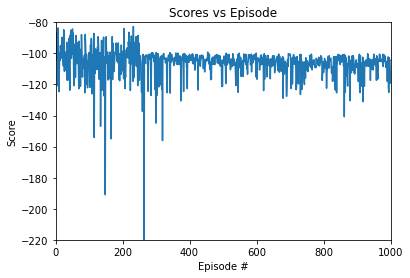

In [19]:
def main():

    global HIGHSCORE
    global rewardlist
    rewardlist=[]
    visualize = input("Visualize? [y/n]\n")
    #VISHUALIZATION DOESN'T SEEM TO WORK ON 
    if visualize == 'y':
        doRender = True
    else:
        doRender = False

    env = gym.make(ENV)

    qTable = defaultdict( lambda: np.zeros((10, 10, 10, 10)))

    myGraph = graph.figure()
    xval, yval = [], []
    mySubPlot = myGraph.add_subplot()
    graph.xlabel("Episode #")
    graph.ylabel("Score")
    graph.title("Scores vs Episode")
    plotLine, = mySubPlot.plot(xval, yval)
    mySubPlot.set_xlim([0, EPISODES])
    mySubPlot.set_ylim([-220, -80])


    for i in range(1, EPISODES + 1):

        epScore = runAlgorithmStep(env, i, qTable, doRender)
        print("Episode finished.n Now plotting..")
        plotEpisode(myGraph, xval, yval, epScore, plotLine, i)
        rewardlist.append(epScore)
    print("All episodes finished. Highest score achieved: " + str(HIGHSCORE))

  
main()

In [20]:
rewardlist

[-100.97603617165942,
 -86.57532862577668,
 -97.03158692634068,
 -104.57544138358762,
 -91.53201413424514,
 -120.8214927267157,
 -83.59563483967001,
 -112.5024276654623,
 -99.13765399318247,
 -124.66589520091006,
 -108.30837400074572,
 -101.39755967529429,
 -104.54827692264284,
 -95.06446185245326,
 -99.46253870792293,
 -102.89365268368729,
 -94.50667099734508,
 -103.12922225362973,
 -89.61910804841686,
 -97.27202071781167,
 -89.9573816108783,
 -104.85799741982441,
 -108.1474076054804,
 -84.72808896959462,
 -99.73741476855551,
 -111.5087504552671,
 -101.16908315309013,
 -99.04952972708828,
 -110.84846253994422,
 -103.17482426691097,
 -104.61138044482428,
 -103.81420140040497,
 -92.78861460641771,
 -117.22167677540062,
 -98.37402262803602,
 -117.27643704892488,
 -100.59344133031948,
 -103.57562562499298,
 -104.75076103785055,
 -90.18795296891312,
 -103.01785454962187,
 -123.65776244637371,
 -88.55389309830149,
 -89.85435097413618,
 -85.05768848665257,
 -91.84854043240978,
 -103.07050077

# Deep Q-Learning 

Uses neural networks to approximate Q-value functions. The state is given as input and Q-value of all possible. By maintaining the memory of the experiences, and an initial policy π.

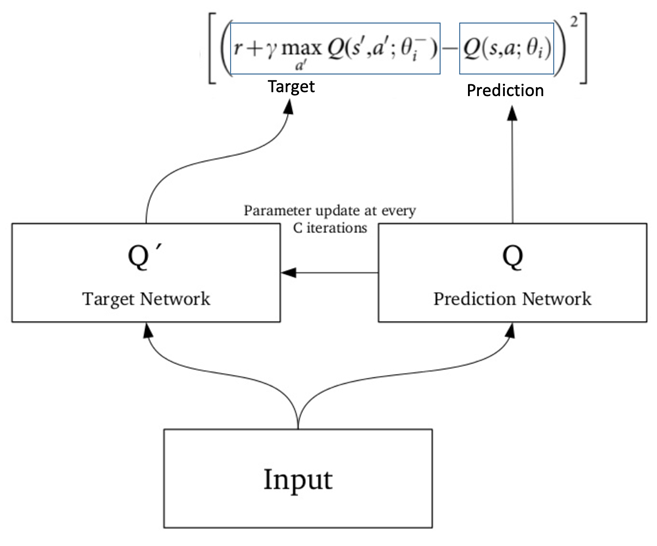


DQN leverages experience replay as a stabilization mechanism. Experience replay collects a buffer of historical transition models and randomly inserts the transition values during the Q-update function because we want to replicate the Temporal Difference target operation using our neural network rather than using a Q-table

In [37]:
import numpy as np
import torch
import random
import gym
from collections import deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import datetime
import pickle
import math

In [38]:
ENV = "BipedalWalker-v3"
MODEL_FILE = "./dqn_model"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
# Hyperparameters
N_GAMES = 1000
MEM_SIZE = 1000000
BATCH_SIZE = 64
TARGET_UPDATE = 2
GAMMA = 0.99
EPSILON = 1
EPSILON_DEC = 1e-3
EPSILON_MIN = 0.05
LR = 1e-4

steps_taken = 0

In [40]:
class ExperienceReplay:
    def __init__(self, buffer_size):
        self.buffer = deque(maxlen=buffer_size)

    def __len__(self):
        return len(self.buffer)

    # Add a transition to the memory by basic SARNS convention. 
    def store_transition(self, state, action, reward, new_state, done):
        # If buffer is abuot to overflow, begin rewriting existing memory? 
        self.buffer.append((state, action, reward, new_state, done))

    # Sample only the memory that has been stored. Samples BATCH
    # amount of samples. 
    def sample(self):
        sample = random.sample(self.buffer, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*sample)
        states = torch.tensor(states).float().to(DEVICE)
        actions = torch.stack(actions).long().to(DEVICE)
        rewards = torch.from_numpy(np.array(rewards, dtype=np.float32).reshape(-1, 1)).to(DEVICE)
        next_states = torch.tensor(next_states).float().to(DEVICE)
        dones = torch.from_numpy(np.array(dones, dtype=np.uint8).reshape(-1, 1)).float().to(DEVICE)
        return (states, actions, rewards, next_states, dones)

In [41]:
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, max_action):
        super(QNetwork, self).__init__()
        # Make a simple 3 layer linear network
        self.l1 = nn.Linear(state_dim, 400)
        self.l2 = nn.Linear(400, 300)
        self.l3 = nn.Linear(300, action_dim)
        self.max_action = max_action

    def forward(self, state):
        x = self.l1(state)
        x = F.relu(x)
        x = F.relu(self.l2(x))
        x = self.max_action * torch.tanh(self.l3(x))
        return x

In [42]:
class Agent():
    # Initialize the agent
    def __init__(self, state_space, action_space):
        self.memory = ExperienceReplay(MEM_SIZE)
        self.action_space = action_space
        self.main_model = QNetwork(state_space.shape[0], action_space.shape[0], action_space.high[0]).to(DEVICE)
        self.target_model = QNetwork(state_space.shape[0], action_space.shape[0], action_space.high[0]).to(DEVICE)
        self.optimizer = optim.Adam(self.main_model.parameters(), lr=LR)

        # Target model will be a copy of the main model and will not be trained
        self.target_model.load_state_dict(self.main_model.state_dict())
        self.target_model.eval()

    # Agent saves its experiences and learn
    def step(self, state, action, reward, new_state, done):
        # Stores the transition into Experience Replay
        self.memory.store_transition(state, action, reward, new_state, done)

        # Agent will only learn when there are enough experiences
        if len(self.memory) > BATCH_SIZE:
            self.learn()

    # Agent learns
    def learn(self):
        # Sample random minibatch of transitions from Experience Replay
        state, action, reward, new_state, done = self.memory.sample()
      
        # Computes Q(s_{curr},a') then chooses columns of actions that were taken for each batch
        q_eval = self.main_model(state)

        # Clone the model and use it to generate Q learning targets for the main model
        # Also predicts the max Q value for the next state
        q_next = self.target_model(new_state)

        # Q learning targets = r if next state is terminal or
        # Q learning targets = r + GAMMA*(Q(s_{next},a')) if next state is not terminal
        q_target = reward + GAMMA*(q_next) *(1-done)

        # Compute MSE loss
        loss = F.mse_loss(q_eval, q_target.unsqueeze(1))

        # Stochastic gradient descent on the loss function and does backpropragation
        self.optimizer.zero_grad()
        loss.backward()
        for param in self.main_model.parameters():
            # Clip the error term to be between -1 and 1
            param.grad.data.clamp_(-1,1)
        self.optimizer.step()



    # Action chosen is either a random action or based on the Bellman Equation
    def choose_action(self, state):
        # EPSILON will esponentially decay
        global steps_taken 
        eps_threshold = EPSILON_MIN + (EPSILON - EPSILON_MIN)*math.exp(-1*steps_taken/EPSILON_DEC)
        steps_taken += 1

        # With probability EPSILON, select a random action
        if np.random.random() < eps_threshold:
            return torch.from_numpy(self.action_space.sample())
        # Otherwise select the action with the highest Q value
        else: 
            state = torch.FloatTensor(state.reshape(1,-1)).to(DEVICE)
            
            # action that maximizes Q*(s',a';THETA)  
            with torch.no_grad():
                return self.main_model(state).flatten().cpu().data

In [43]:
def save_model(model, path):
    torch.save(model.state_dict(), path)

def load_model(model, path):
    model.load_state_dict(torch.load(path))
    return model

def replay_actions(env, actions):
    done = False
    state = env.reset()
    for action in actions:
        env.render()
        env.step(action)
    env.close()

def store_actions(actions, path):
    actions_file = open(path,'wb')
    pickle.dump(actions, actions_file)
    actions_file.close()

def load_actions(path):
    actions_file = open(path,'rb')
    actions = pickle.load(actions_file)
    actions_file.close()

    return actions

In [46]:
def main():
    env = gym.make(ENV)
    state_space = env.observation_space
    action_space = env.action_space
    agent = Agent(state_space, action_space)

    visual = input("visualize? [y/n]: ")
    load = input("\nload from model? [y/n]: ")
    
    if load == "y":
        load_path = input("\npath to load from: ")
        agent.main_model = load_model(agent.main_model, load_path)
        agent.target_model = load_model(agent.main_model, load_path)
        actions = load_actions(load_path+'_actions')

        if visual == "y": 
            replay_actions(env, actions)


    max_score = -10000
    max_game = 0
    global scores
    scores = []
    start = datetime.datetime.now()

    for game in range(N_GAMES):
        done = False
        score = 0
        observation = env.reset()
        game_actions = [] # actions taken during this game
        episode_start = datetime.datetime.now()

        while not done:
            # Depending on probability of EPSILON, either select a random action or select an action based on the Bellman Equation
            action = agent.choose_action(observation)

            # Execute the action in env and observe reward and next state
            next_observation, reward, done, info = env.step(action)

            # Stores experiences and learns
            agent.step(observation, action, reward, next_observation, done)

            # Update variables each step
            game_actions.append(action)
            score += float(reward)
            observation = next_observation

        # Every TARGET_UPDATE games, reset the target model to the main model
        if game % TARGET_UPDATE == 0:
            agent.target_model.load_state_dict(agent.main_model.state_dict())

        # Update variables each game
        episode_end = datetime.datetime.now()
        elapsed = episode_end - episode_start
        scores.append(score)
        avg_score = np.mean(scores[-100:])

        # Checks if the max score has been beaten
        if score > max_score:
            max_score = score
            max_game = game

            save_model(agent.main_model, MODEL_FILE)
            store_actions(game_actions, MODEL_FILE+'_actions')

            if visual == 'y':
                replay_actions(env, game_actions)

        print('game:', game)
        print('reward:', str(score))
        print("max reward:", str(max_score), "at game", str(max_game))
        print('average score for the last 100 games:', avg_score)
        print('time:', str(elapsed.total_seconds()),'seconds')
        print()

    # After going through N_GAMES
    end = datetime.datetime.now()
    elapsed = end - start

    print('Total time:',elapsed.total_seconds(), 'seconds')

    scores_file = open(MODEL_FILE+'_scores','wb')
    pickle.dump(scores, scores_file)
    scores_file.close()

        


main()

visualize? [y/n]: y

load from model? [y/n]: n


C:\Users\MANUDW~1\AppData\Local\Temp/ipykernel_23096/435184973.py:40: UserWarning: Using a target size (torch.Size([64, 1, 4])) that is different to the input size (torch.Size([64, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(q_eval, q_target.unsqueeze(1))


game: 0
reward: -103.4484308322516
max reward: -103.4484308322516 at game 0
average score for the last 100 games: -103.4484308322516
time: 1.582001 seconds

game: 1
reward: -44.532272779053386
max reward: -44.532272779053386 at game 1
average score for the last 100 games: -73.9903518056525
time: 8.069502 seconds

game: 2
reward: -93.73891202623005
max reward: -44.532272779053386 at game 1
average score for the last 100 games: -80.57320521251168
time: 0.571999 seconds

game: 3
reward: -94.47900940236208
max reward: -44.532272779053386 at game 1
average score for the last 100 games: -84.04965625997428
time: 0.545997 seconds

game: 4
reward: -51.61292568692448
max reward: -44.532272779053386 at game 1
average score for the last 100 games: -77.56231014536432
time: 7.368496 seconds

game: 5
reward: -62.98640569242604
max reward: -44.532272779053386 at game 1
average score for the last 100 games: -75.13299273654128
time: 7.695001 seconds

game: 6
reward: -62.180327200554984
max reward: -44.5

KeyboardInterrupt: 

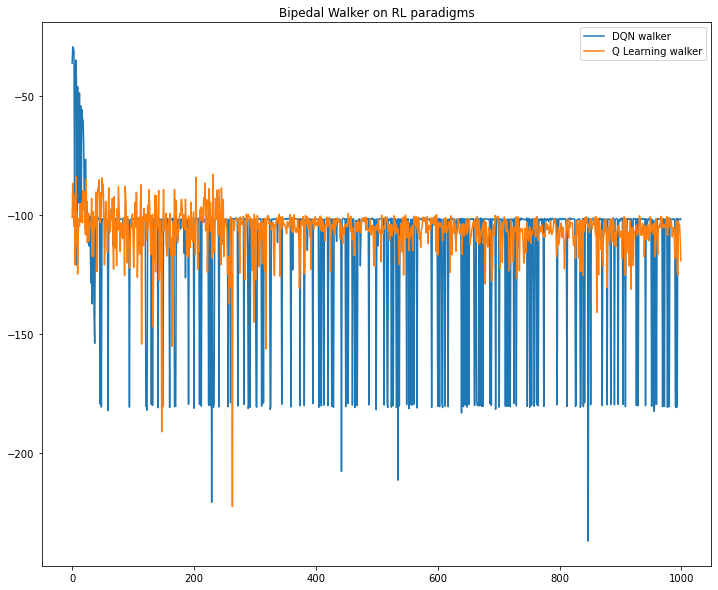

In [36]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(12,10))
plt.plot(scores, label= "DQN walker")
plt.plot(rewardlist, label = "Q Learning walker")
plt.title("Bipedal Walker on RL paradigms")
plt.legend()

# Automatic Curriculum Learning 

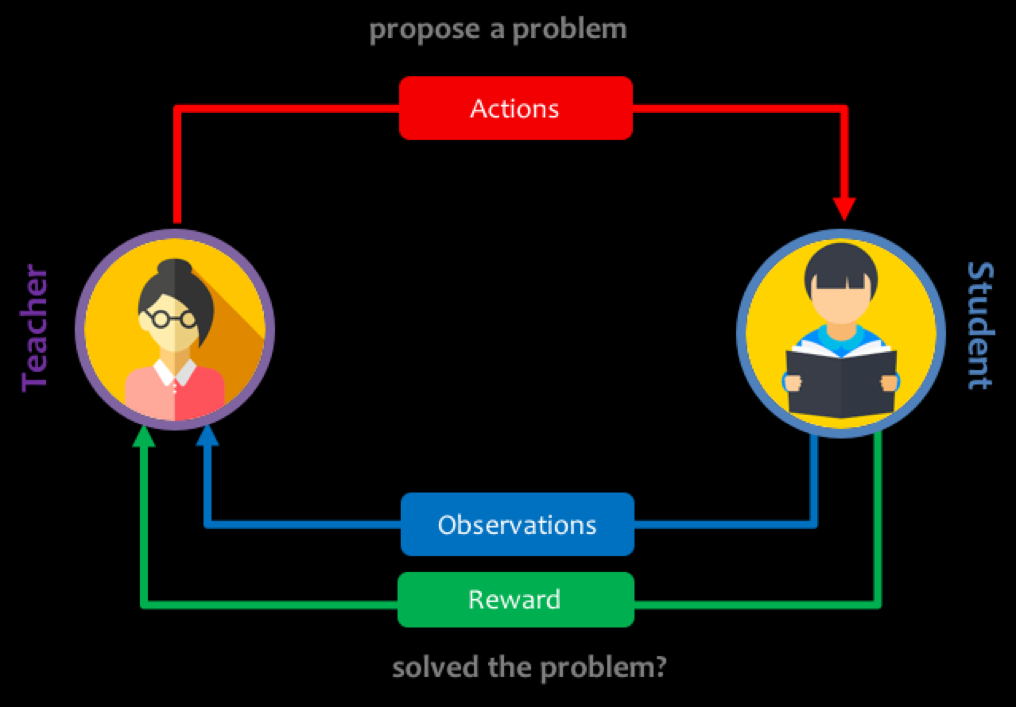

1. Student network: receives a task, and is expected to interact in the environment and learn how to solve it.

2. Teacher network: proposes tasks by observing the progress signal of the student and sampling new tasks that maximise this signal.

### **STUDENT**

The student can be any classical Deep Reinforcement Learning agent, as from its point of view, it is only expected to solve tasks provided to it. It will be trained end-to-end, using the extrinsic reward function of the task being tackled.

### **TEACHER**

The teacher should be able to follow the student progress, and propose tasks in a sequence which overall should lead to the student solving complex tasks it couldn’t before. It effectively needs to explore the space of tasks effectively, as depending on the expertise of the student the same task can be valuable or useless.

In [2]:
env = gym.make('BipedalWalker-v3')
env.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [6]:
import numpy as np
import time
import random
import matplotlib as plt
import gym
import pygame
import os
from collections import deque
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM


STUDENT_LR = 0.001
TEACHER_LR = 0.001
TEACHER_PRECISION = 0.99
IMPROVEMENT_WEIGHT = 0.001
RANDOM_SEED = 6
TOTAL_EPISODES = 1000
TEACHER_OUTPUT_SIZE = 1
WIN_REWARD = -110

state_space= env.observation_space
action_space = env.action_space

def one_hot_encoder(index, size):
    return tf.one_hot(indices=index, depth=size).numpy()

def make_student(state_shape, action_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=state_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(action_shape, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=STUDENT_LR), metrics=['accuracy'])
    return model


def make_teacher(state_shape, output_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=state_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(output_shape, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=TEACHER_LR), metrics=['accuracy'])
    return model

def CL_teacher(observation, nextObservation, teacherAgent, reward, done):
    obsvReshape = observation.reshape([1, observation.shape[0]])
    nextObsvReshape = nextObservation.reshape([1, nextObservation.shape[0]])
    
    currActionQuality = np.array(teacherAgent.predict(obsvReshape))[0]
    nextActionQuality = np.array(teacherAgent.predict(nextObsvReshape))[0]
    
    targetQuality = reward + (1-done)*TEACHER_PRECISION*nextActionQuality
    improvement = targetQuality-currActionQuality
    teacherAgent.fit(obsvReshape, np.vstack([targetQuality]), verbose=0)
    
    return improvement

def student_action(observation, studentAgent, env):
    
    obsvReshape = observation.reshape([1, observation.shape[0]])
    probAction = studentAgent.predict(obsvReshape).flatten()
    action = np.random.choice(env.action_space.n, 1, p=probAction)[0]
    oneHotAction = tf.one_hot(indices=action, depth=env.action_space.n).numpy()
    
    return action, probAction, oneHotAction
    
    
studentAgent = make_student(state_shape, action_shape)
teacherAgent = make_teacher(state_shape, TEACHER_OUTPUT_SIZE)
cumEpisodeRewards = deque(maxlen=100)
total_episode_rewards = []

for episode in range(TOTAL_EPISODES):
    episodeReward = 0
    observation = env.reset()
    done = False
    
    while not done:
        # env.render()
        action, probAction, oneHotAction = student_action(observation, studentAgent, env)
        nextObservation, reward, done, _ = env.step(action)
        improvement = CL_teacher(observation, nextObservation, teacherAgent, reward, done)
        studentTarget = probAction + IMPROVEMENT_WEIGHT * (oneHotAction-probAction) * improvement
        studentAgent.fit(observation.reshape([1, observation.shape[0]]), np.vstack([studentTarget]), verbose=0)
        observation = nextObservation
        episodeReward += reward
        if done:
            print(f'Episode Reward={episodeReward} at episode {episode}')
            cumEpisodeRewards.append(episodeReward)
            total_episode_rewards.append(episodeReward)
            mean_score = np.mean(cumEpisodeRewards)
            
            if mean_score >= WIN_REWARD and episode >= 100:
                print(f'Total episodes: {episode} \n Solved after {episode-100} episodes!')
                break
env.close()
                
# if __name__ == '__main__':
#     main()  

TypeError: 'int' object is not iterable

In [9]:
action_space

Box([-1. -1. -1. -1.], [1. 1. 1. 1.], (4,), float32)